**This project is to identify the  stock which are performing  together   using  KNN and PCA **

**The below setction first install all the packages**.
**We are trying to read the csv in cloab so we are first trying to establish the authetication using gmail **
**Then based on the id we are trying to read the csv**

In [0]:
!pip install -U -q PyDrive

In [2]:
import keras
import psutil
import pandas as pd
import tensorflow as tf
from google.colab import auth
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import sqlite3
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file1 = drive.CreateFile({'id':'1eE_0O9_evBVkFxniF63-Hc4D90B34Du3'})
file1.GetContentFile('data_stocks.csv')

**Read the csv and print few datas**

In [0]:
data=pd.read_csv('data_stocks.csv')

In [6]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


**Get the shape of the stock data**

In [7]:
data.shape

(41266, 502)

**Since SP500 and Date column are not of importance so taking out these columns from the data frame**

In [0]:
X=data.pop('SP500')

In [0]:
x=data.pop('DATE')

**Print the shape of the data after the two columns has been removed**

In [10]:
data.shape

(41266, 500)

**Check if the columns has any missing values**

In [11]:
data.isna().sum()

NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
NASDAQ.CTAS     0
NASDAQ.CTSH     0
               ..
NYSE.USB        0
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM  

**Using the Principal Component Analysis (PCA), map into columns to 3  since it is not feasible to create the model with 502 columns**

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 3)

In [14]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_reduced = pca.transform(data)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
X_reduced_df =pd.DataFrame(X_reduced, columns =["pc1", "pc2", "pc3"])

**Display the 3D columns using scatter plots**

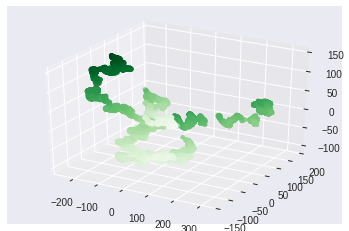

In [18]:
fig = plt.figure()
ax =plt.axes(projection ='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata,ydata,zdata,c=zdata, cmap='Greens')

**Using K nearest Neighbour (KNN) create 3 clusters to group the stocks**

In [0]:
from sklearn.cluster import KMeans

In [0]:
k_means=KMeans(n_clusters=3, random_state=0)
k_means.fit(data)
y_pred =k_means.predict(data)

**Using scatter plots display the data**

In [0]:
colors=np.array(['#FF0045','#FBD039','#23C2BC'])

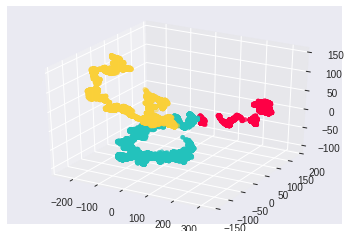

In [22]:
colors=np.array(['#FF0045','#FBD039','#23C2BC'])
fig = plt.figure()
ax =plt.axes(projection ='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata,ydata,zdata, c=colors[y_pred])


**Transpose the dataframe (Change columns to rows and rows to columns)**

In [0]:
df = data.transpose()

**Using PCA  bring the columns into 3 dimension**

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 3)

In [30]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_reduced = pca.transform(df)

**Using scatter plots display the data**

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
X_reduced_df =pd.DataFrame(X_reduced, columns =["pc1", "pc2", "pc3"])

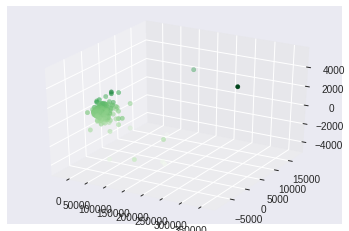

In [35]:
fig = plt.figure()
ax =plt.axes(projection ='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata,ydata,zdata,c=zdata, cmap='Greens')

**Use KNN to cluster the stocks into 3 groups**

In [0]:
from sklearn.cluster import KMeans

In [0]:
k_means=KMeans(n_clusters=3, random_state=0)
k_means.fit(df)
y_pred1 =k_means.predict(df)

**Display the data using scatter plots**

In [0]:
colors=np.array(['#FF0045','#FBD039','#23C2BC'])

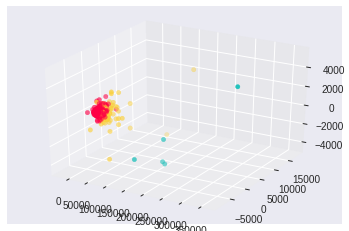

In [39]:
colors=np.array(['#FF0045','#FBD039','#23C2BC'])
fig = plt.figure()
ax =plt.axes(projection ='3d')
xdata = X_reduced_df.pc1
ydata = X_reduced_df.pc2
zdata = X_reduced_df.pc3
ax.scatter3D(xdata,ydata,zdata, c=colors[y_pred1])

**Create a new column Cluster and add the predicted values to it**

In [0]:
df['Cluster']=y_pred1

**Display the data after the cluster column is added**

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74,0
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98,1
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16,1
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69,0
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47,0


**Group the stocks using cluster column**

In [43]:
df.groupby(['Cluster'],axis=0).count().iloc[:,0]

Cluster
0    417
1     78
2      5
Name: 0, dtype: int64

**Problem 1**

**There are various stocks for which we have collected a data set, which all stocks are **
**apparently similiar in performance**

**a) Display the stocks which are in cluster 0**

In [44]:
df[df['Cluster']==0]

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.470,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.7100,44.7200,44.7300,44.740,44.7100,44.740,0
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.190,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.620,83.5800,83.690,0
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.370,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.520,106.4000,106.470,0
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.820,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.470,114.3300,114.460,0
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.410,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.1450,47.1500,47.1500,47.150,47.1350,47.150,0
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.610,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.330,142.1700,142.410,0
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.960,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.1300,45.1300,45.1300,45.135,45.0650,45.120,0
NASDAQ.AMD,14.6100,14.7100,14.6400,14.6300,14.6700,14.6800,14.6563,14.684,14.6942,14.6300,...,12.9900,12.9900,12.9950,12.9850,12.9850,12.9850,12.970,12.9650,13.000,0
NASDAQ.ATVI,49.8500,49.9400,49.8600,49.9150,49.9150,49.9700,50.0000,50.020,50.0100,50.0100,...,65.5700,65.5300,65.5600,65.5550,65.5800,65.5900,65.540,65.4450,65.560,0
NASDAQ.BBBY,39.4300,39.6800,39.6000,39.5700,39.5500,39.5800,39.4900,39.510,39.4950,39.4433,...,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.300,29.3000,29.300,0


**a) Display the stocks which are in cluster 1**

In [45]:
df[df['Cluster']==1]

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAPL,143.680,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.0100,163.8800,163.980,1
NASDAQ.ADBE,129.630,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.1400,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.0650,154.9600,155.160,1
NASDAQ.AMGN,164.630,164.6800,164.9050,164.7600,164.8500,164.9225,164.8200,164.7269,164.7050,164.7900,...,177.7400,177.8600,177.8600,177.8650,177.8512,177.7800,177.7600,177.6300,177.820,1
NASDAQ.AVGO,219.110,219.9800,219.3900,219.3000,219.1800,219.4900,219.7200,219.8700,219.8200,219.2701,...,252.0500,252.0700,252.0950,251.7900,251.9150,252.1200,252.0100,251.7600,252.070,1
NASDAQ.BIIB,274.080,273.9900,274.2750,273.5900,273.5400,274.1300,273.8700,274.0500,273.8700,274.3800,...,315.9700,316.0500,316.0200,316.0000,316.2000,316.5800,316.3200,316.3700,316.580,1
NASDAQ.CHTR,330.730,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,...,398.2500,397.9700,397.9100,398.1400,398.2300,398.2400,398.3300,397.9800,398.540,1
NASDAQ.COST,167.740,167.7760,168.0000,168.2000,168.0400,168.0950,168.0825,168.0100,167.9000,168.0440,...,156.7800,156.8800,156.8100,156.8000,156.8000,156.8200,156.8000,156.7300,156.740,1
NASDAQ.EQIX,400.940,400.4000,401.9850,401.5000,399.7704,399.7704,401.0150,400.7900,400.1500,399.7950,...,468.6100,468.5750,468.1700,468.2700,468.2400,468.1900,468.1200,467.9300,468.410,1
NASDAQ.EXPE,126.340,126.3900,126.5300,126.5400,126.4500,126.4800,126.2900,126.3000,126.1900,126.2300,...,148.3000,148.4000,148.3400,148.2000,148.2100,148.1850,148.1800,148.1650,148.360,1
NASDAQ.FB,141.940,141.8625,141.9100,141.8700,141.7800,141.9286,142.1500,142.0600,142.1500,142.0700,...,171.7550,171.8200,171.7900,171.7700,171.8200,171.8250,171.7500,171.6600,172.000,1


**a) Display the stocks which are in cluster 2**

In [46]:
df[df['Cluster']==2]

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.310,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.0100,979.81,979.4450,980.60,2
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.300,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.6700,938.13,937.6800,939.33,2
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.250,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.4700,953.88,953.4650,955.24,2
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.610,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.6700,1004.04,1003.3100,1004.67,2
NASDAQ.PCLN,1776.26,1779.4606,1777.5500,1776.4301,1774.0800,1775.0000,1776.585,1777.0100,1776.03,1775.5736,...,1850.46,1850.800,1851.520,1851.85,1851.015,1852.1401,1852.29,1852.2499,1852.08,2


**Problem -2**

**How many Unique patters that exists in the historical stock data set,**
**based on fluctuations in price**

**Ans:-     3 unique patters exists in historical stock data set**

**Problem -3**

**Identify which all stocks are moving together **
**and which all stocks are different from each other**

**a ) Stocks which are moving together to cluster 0**

In [47]:
df[df['Cluster']==0]

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.470,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.7100,44.7200,44.7300,44.740,44.7100,44.740,0
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.190,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.620,83.5800,83.690,0
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.370,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.520,106.4000,106.470,0
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.820,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.470,114.3300,114.460,0
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.410,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.1450,47.1500,47.1500,47.150,47.1350,47.150,0
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.610,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.330,142.1700,142.410,0
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.960,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.1300,45.1300,45.1300,45.135,45.0650,45.120,0
NASDAQ.AMD,14.6100,14.7100,14.6400,14.6300,14.6700,14.6800,14.6563,14.684,14.6942,14.6300,...,12.9900,12.9900,12.9950,12.9850,12.9850,12.9850,12.970,12.9650,13.000,0
NASDAQ.ATVI,49.8500,49.9400,49.8600,49.9150,49.9150,49.9700,50.0000,50.020,50.0100,50.0100,...,65.5700,65.5300,65.5600,65.5550,65.5800,65.5900,65.540,65.4450,65.560,0
NASDAQ.BBBY,39.4300,39.6800,39.6000,39.5700,39.5500,39.5800,39.4900,39.510,39.4950,39.4433,...,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.300,29.3000,29.300,0


** b) Stocks which are moving together to cluster 1**

In [48]:
df[df['Cluster']==1]

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAPL,143.680,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.0100,163.8800,163.980,1
NASDAQ.ADBE,129.630,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.1400,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.0650,154.9600,155.160,1
NASDAQ.AMGN,164.630,164.6800,164.9050,164.7600,164.8500,164.9225,164.8200,164.7269,164.7050,164.7900,...,177.7400,177.8600,177.8600,177.8650,177.8512,177.7800,177.7600,177.6300,177.820,1
NASDAQ.AVGO,219.110,219.9800,219.3900,219.3000,219.1800,219.4900,219.7200,219.8700,219.8200,219.2701,...,252.0500,252.0700,252.0950,251.7900,251.9150,252.1200,252.0100,251.7600,252.070,1
NASDAQ.BIIB,274.080,273.9900,274.2750,273.5900,273.5400,274.1300,273.8700,274.0500,273.8700,274.3800,...,315.9700,316.0500,316.0200,316.0000,316.2000,316.5800,316.3200,316.3700,316.580,1
NASDAQ.CHTR,330.730,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,330.7300,...,398.2500,397.9700,397.9100,398.1400,398.2300,398.2400,398.3300,397.9800,398.540,1
NASDAQ.COST,167.740,167.7760,168.0000,168.2000,168.0400,168.0950,168.0825,168.0100,167.9000,168.0440,...,156.7800,156.8800,156.8100,156.8000,156.8000,156.8200,156.8000,156.7300,156.740,1
NASDAQ.EQIX,400.940,400.4000,401.9850,401.5000,399.7704,399.7704,401.0150,400.7900,400.1500,399.7950,...,468.6100,468.5750,468.1700,468.2700,468.2400,468.1900,468.1200,467.9300,468.410,1
NASDAQ.EXPE,126.340,126.3900,126.5300,126.5400,126.4500,126.4800,126.2900,126.3000,126.1900,126.2300,...,148.3000,148.4000,148.3400,148.2000,148.2100,148.1850,148.1800,148.1650,148.360,1
NASDAQ.FB,141.940,141.8625,141.9100,141.8700,141.7800,141.9286,142.1500,142.0600,142.1500,142.0700,...,171.7550,171.8200,171.7900,171.7700,171.8200,171.8250,171.7500,171.6600,172.000,1


**c ) Stocks which are moving together to cluster 2**

In [49]:
df[df['Cluster']==2]

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.310,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.0100,979.81,979.4450,980.60,2
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.300,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.6700,938.13,937.6800,939.33,2
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.250,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.4700,953.88,953.4650,955.24,2
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.610,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.6700,1004.04,1003.3100,1004.67,2
NASDAQ.PCLN,1776.26,1779.4606,1777.5500,1776.4301,1774.0800,1775.0000,1776.585,1777.0100,1776.03,1775.5736,...,1850.46,1850.800,1851.520,1851.85,1851.015,1852.1401,1852.29,1852.2499,1852.08,2
